In [ ]:
!pip install sklearn-crfsuite


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 38.9 MB/s eta 0:00:00


In [ ]:

# import nltk
# import numpy as np
# from sklearn_crfsuite import CRF
# from keras.models import Sequential
# from keras.layers import Embedding, LSTM, Dense, Bidirectional
# from nltk.corpus import treebank
# from sklearn.metrics import classification_report

# # Step 1: Load and preprocess dataset for POS tagging
# nltk.download('treebank')
# sentences = treebank.tagged_sents()
# train_sents, test_sents = sentences[:3000], sentences[3000:]

# # Step 2: Prepare data for Probabilistic Model - CRF
# def prepare_data_crf(sents):
#     return [[(word, tag) for word, tag in sent] for sent in sents]

# train_data_crf = prepare_data_crf(train_sents)
# test_data_crf = prepare_data_crf(test_sents)

# # Step 3: CRF Model for POS Tagging
# crf = CRF(algorithm='lbfgs')
# crf.fit([x for x, _ in train_data_crf], [y for _, y in train_data_crf])

# # Step 4: Prepare data for Neural Model - BiLSTM
# def prepare_data_lstm(sents):
#     words, tags = [], []
#     for sent in sents:
#         words.append([word for word, tag in sent])
#         tags.append([tag for word, tag in sent])
#     return words, tags

# train_words, train_tags = prepare_data_lstm(train_sents)
# test_words, test_tags = prepare_data_lstm(test_sents)

# # Step 5: LSTM Model for POS Tagging
# model = Sequential()
# model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))
# model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
# model.add(Dense(num_tags, activation="softmax"))
# model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# model.fit(train_words, train_tags, epochs=5)

# # Evaluation and comparison metrics can be added here


In [ ]:
import nltk
import numpy as np
from sklearn_crfsuite import CRF
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional
from nltk.corpus import treebank
from sklearn.metrics import classification_report
from itertools import chain

# Step 1: Load and preprocess dataset for POS tagging
nltk.download('treebank')
sentences = treebank.tagged_sents()
train_sents, test_sents = sentences[:3000], sentences[3000:]

# Step 2: Define feature extraction function for each word
def word2features(sent, i):
    word = sent[i][0]
    features = {
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        features.update({
            '-1:word.lower()': sent[i-1][0].lower(),
            '-1:word.istitle()': sent[i-1][0].istitle(),
            '-1:word.isupper()': sent[i-1][0].isupper(),
        })
    else:
        features['BOS'] = True  # Beginning of sentence

    if i < len(sent)-1:
        features.update({
            '+1:word.lower()': sent[i+1][0].lower(),
            '+1:word.istitle()': sent[i+1][0].istitle(),
            '+1:word.isupper()': sent[i+1][0].isupper(),
        })
    else:
        features['EOS'] = True  # End of sentence

    return features

def prepare_data_crf(sents):
    X, y = [], []
    for sent in sents:
        X.append([word2features(sent, i) for i in range(len(sent))])
        y.append([tag for _, tag in sent])
    return X, y

# Step 3: Prepare data for CRF
train_X, train_y = prepare_data_crf(train_sents)
test_X, test_y = prepare_data_crf(test_sents)

# Step 4: CRF Model for POS Tagging
crf = CRF(algorithm='lbfgs')
crf.fit(train_X, train_y)

# Step 5: Evaluation
y_pred = crf.predict(test_X)

# Flatten the lists of true labels and predicted labels
def flatten(lst):
    return list(chain.from_iterable(lst))

test_y_flat = flatten(test_y)
y_pred_flat = flatten(y_pred)

# Print classification report
print(classification_report(test_y_flat, y_pred_flat))


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


              precision    recall  f1-score   support

           #       1.00      0.67      0.80         3
           $       1.00      1.00      1.00       255
          ''       1.00      1.00      1.00        92
           ,       1.00      1.00      1.00      1106
       -LRB-       1.00      1.00      1.00        32
      -NONE-       0.97      1.00      0.98      1503
       -RRB-       1.00      1.00      1.00        32
           .       1.00      1.00      1.00       891
           :       1.00      1.00      1.00        81
          CC       1.00      1.00      1.00       503
          CD       0.99      0.88      0.93      1208
          DT       0.99      0.99      0.99      1831
          EX       1.00      1.00      1.00        11
          IN       0.97      0.97      0.97      2298
          JJ       0.67      0.81      0.74      1283
         JJR       0.86      0.70      0.77        94
         JJS       0.93      0.60      0.72        42
          MD       0.99    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [2]:
pip install sklearn-crfsuite keras tensorflow pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 55.0 MB/s eta 0:00:00


In [3]:
import nltk
import numpy as np
from sklearn_crfsuite import CRF
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, TimeDistributed
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from itertools import chain
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

# Load dataset and split it into training and test sets
nltk.download('treebank')
sentences = nltk.corpus.treebank.tagged_sents()
train_sents, test_sents = sentences[:3000], sentences[3000:]

# Step 1: Feature extraction for CRF
def word2features(sent, i):
    word = sent[i][0]
    features = {
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
    }
    if i > 0:
        features.update({
            '-1:word.lower()': sent[i-1][0].lower(),
            '-1:word.istitle()': sent[i-1][0].istitle(),
            '-1:word.isupper()': sent[i-1][0].isupper(),
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        features.update({
            '+1:word.lower()': sent[i+1][0].lower(),
            '+1:word.istitle()': sent[i+1][0].istitle(),
            '+1:word.isupper()': sent[i+1][0].isupper(),
        })
    else:
        features['EOS'] = True

    return features

def prepare_data_crf(sents):
    X, y = [], []
    for sent in sents:
        X.append([word2features(sent, i) for i in range(len(sent))])
        y.append([tag for _, tag in sent])
    return X, y

train_X, train_y = prepare_data_crf(train_sents)
test_X, test_y = prepare_data_crf(test_sents)

# Step 2: CRF Model
crf = CRF(algorithm='lbfgs')
crf.fit(train_X, train_y)
y_pred_crf = crf.predict(test_X)

# Flatten labels for evaluation
def flatten(lst):
    return list(chain.from_iterable(lst))

test_y_flat = flatten(test_y)
y_pred_flat = flatten(y_pred_crf)
print("CRF Model Classification Report")
print(classification_report(test_y_flat, y_pred_flat))

# Step 3: Data Preparation for BiLSTM
words = list(set(word for sent in sentences for word, _ in sent))
tags = list(set(tag for sent in sentences for _, tag in sent))
word2idx = {w: i + 2 for i, w in enumerate(words)}
word2idx["PAD"] = 0
word2idx["UNK"] = 1
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Encode sentences
max_len = 50  # max sentence length
X_train = [[word2idx.get(w[0], word2idx["UNK"]) for w in s] for s in train_sents]
X_test = [[word2idx.get(w[0], word2idx["UNK"]) for w in s] for s in test_sents]
X_train = pad_sequences(X_train, maxlen=max_len, padding="post")
X_test = pad_sequences(X_test, maxlen=max_len, padding="post")

# Encode labels
y_train = [[tag2idx[w[1]] for w in s] for s in train_sents]
y_test = [[tag2idx[w[1]] for w in s] for s in test_sents]
y_train = pad_sequences(y_train, maxlen=max_len, padding="post")
y_test = pad_sequences(y_test, maxlen=max_len, padding="post")
y_train = [to_categorical(i, num_classes=len(tag2idx)) for i in y_train]
y_test = [to_categorical(i, num_classes=len(tag2idx)) for i in y_test]

# Step 4: BiLSTM Model
model = Sequential()
model.add(Embedding(input_dim=len(word2idx), output_dim=50, input_length=max_len))
model.add(Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)))
model.add(TimeDistributed(Dense(len(tag2idx), activation="softmax")))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary()

# Train BiLSTM model
history = model.fit(np.array(X_train), np.array(y_train), batch_size=32, epochs=5, validation_split=0.1, verbose=1)

# Evaluate BiLSTM model
y_pred_bilstm = model.predict(np.array(X_test), verbose=1)
y_pred_bilstm = np.argmax(y_pred_bilstm, axis=-1)
y_test_true = np.argmax(np.array(y_test), axis=-1)

# Map indexes to tags for evaluation
y_pred_bilstm = [[list(tag2idx.keys())[i] for i in row] for row in y_pred_bilstm]
y_test_true = [[list(tag2idx.keys())[i] for i in row] for row in y_test_true]
y_test_flat = flatten(y_test_true)
y_pred_flat_bilstm = flatten(y_pred_bilstm)

print("BiLSTM Model Classification Report")
print(classification_report(y_test_flat, y_pred_flat_bilstm))

# Step 5: Simple Spellchecking Component
spell = SpellChecker()

def check_spelling(word):
    if word.lower() not in spell:
        correction = spell.correction(word)
        return correction if correction else word
    return word

# Example: Spellchecking output
test_sentence = "This is an exmple sentnce with smple errrors."
corrected_sentence = " ".join([check_spelling(word) for word in test_sentence.split()])
print("\nOriginal Sentence:", test_sentence)
print("Corrected Sentence:", corrected_sentence)



[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.


CRF Model Classification Report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           #       1.00      0.67      0.80         3
           $       1.00      1.00      1.00       255
          ''       1.00      1.00      1.00        92
           ,       1.00      1.00      1.00      1106
       -LRB-       1.00      1.00      1.00        32
      -NONE-       0.97      1.00      0.98      1503
       -RRB-       1.00      1.00      1.00        32
           .       1.00      1.00      1.00       891
           :       1.00      1.00      1.00        81
          CC       1.00      1.00      1.00       503
          CD       0.99      0.88      0.93      1208
          DT       0.99      0.99      0.99      1831
          EX       1.00      1.00      1.00        11
          IN       0.97      0.97      0.97      2298
          JJ       0.67      0.81      0.74      1283
         JJR       0.86      0.70      0.77        94
         JJS       0.93      0.60      0.72        42
          MD       0.99    

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 17s 121ms/step - accuracy: 0.4900 - loss: 2.3254 - val_accuracy: 0.6089 - val_loss: 1.3969
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.6650 - loss: 1.3172 - val_accuracy: 0.7727 - val_loss: 0.8608
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.8004 - loss: 0.7609 - val_accuracy: 0.8855 - val_loss: 0.4826
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - accuracy: 0.9112 - loss: 0.3923 - val_accuracy: 0.9273 - val_loss: 0.3066
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9579 - loss: 0.2102 - val_accuracy: 0.9405 - val_loss: 0.2305
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step
BiLSTM Model Classification Report


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           #       0.76      1.00      0.86        80
           $       0.98      0.99      0.99       226
          ''       0.93      0.78      0.85      1208
           ,       0.00      0.00      0.00        11
       -LRB-       0.99      1.00      0.99       225
       -RRB-       0.58      1.00      0.73        26
           .       0.90      0.84      0.87       358
           :       0.81      0.94      0.87       550
          CC       0.82      0.86      0.84      2087
          CD       0.00      0.00      0.00         6
          DT       0.00      0.00      0.00         5
          EX       0.44      0.34      0.39        35
          FW       0.00      0.00      0.00        30
          IN       1.00      1.00      1.00       516
          JJ       0.00      0.00      0.00        18
         JJR       0.87      0.84      0.85      1326
         JJS       0.00      0.00      0.00         4
          LS       1.00    

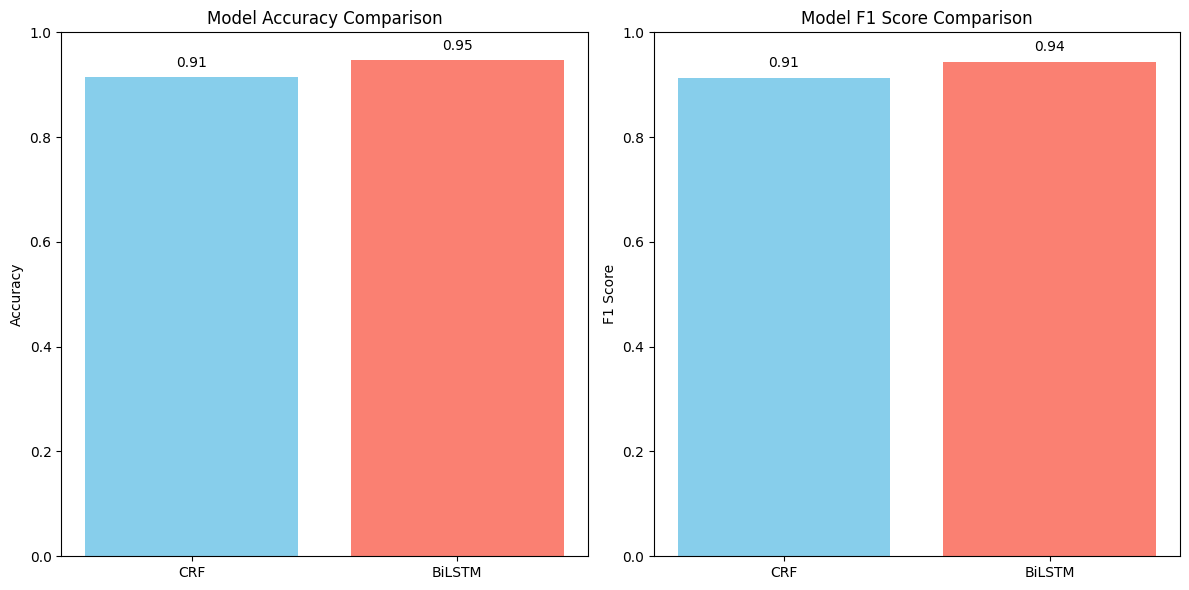

In [4]:

# Calculate accuracy and F1 scores for CRF
crf_accuracy = accuracy_score(test_y_flat, y_pred_flat)
crf_f1 = f1_score(test_y_flat, y_pred_flat, average='weighted')

# Calculate accuracy and F1 scores for BiLSTM
bilstm_accuracy = accuracy_score(y_test_flat, y_pred_flat_bilstm)
bilstm_f1 = f1_score(y_test_flat, y_pred_flat_bilstm, average='weighted')

# Plotting the results
models = ['CRF', 'BiLSTM']
accuracies = [crf_accuracy, bilstm_accuracy]
f1_scores = [crf_f1, bilstm_f1]

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar plot for Accuracy
ax[0].bar(models, accuracies, color=['skyblue', 'salmon'])
ax[0].set_title('Model Accuracy Comparison')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Bar plot for F1 Score
ax[1].bar(models, f1_scores, color=['skyblue', 'salmon'])
ax[1].set_title('Model F1 Score Comparison')
ax[1].set_ylabel('F1 Score')
ax[1].set_ylim(0, 1)
for i, v in enumerate(f1_scores):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()